Idea: Instead of doing expensive node contraction and all pair shortest path calculation per motif, calculate all pair shortest paths once for G, then do "manual" contraction, by collecting path participation of nodes.

However, such contraction can change the shortest paths, which is exemplified in this notebook. THerefore, this approach does not work.

{'A': Text(0, 0, 'A'),
 'B': Text(0, 0.33, 'B'),
 'C': Text(0, 0.66, 'C'),
 'D': Text(0, 1, 'D'),
 'M1': Text(-0.2, 0.2, 'M1'),
 'M2': Text(-0.2, 0.4, 'M2'),
 'M3': Text(-0.2, 0.6, 'M3'),
 'M4': Text(-0.2, 0.8, 'M4')}

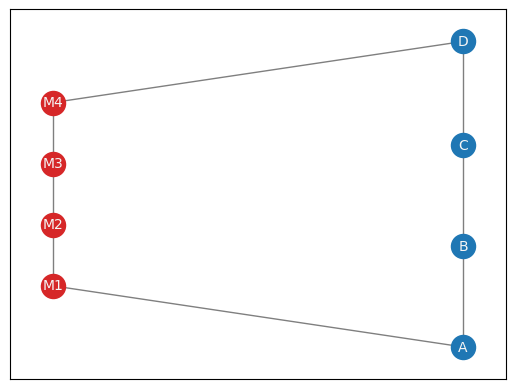

In [38]:
import networkx as nx

g = nx.Graph()

g.add_node("A")
g.add_node("B")
g.add_node("C")
g.add_node("D")

g.add_node("M1")
g.add_node("M2")
g.add_node("M3")
g.add_node("M4")

g.add_edge("A", "B")
g.add_edge("A", "M1")

g.add_edge("B", "C")
g.add_edge("C", "D")
g.add_edge("D", "M4")

g.add_edge("M1", "M2")
g.add_edge("M2", "M3")
g.add_edge("M3", "M4")


pos={
    "A": [0,0],
    "B": [0,0.33],
    "C": [0,0.66],
    "D": [0,1],
    "M1": [-0.2,0.2],
    "M2": [-0.2,0.4],
    "M3": [-0.2,0.6],
    "M4": [-0.2,0.8],
}

nx.draw_networkx_nodes(
    g, pos, nodelist=["M1", "M2", "M3", "M4", ], node_color="tab:red"
)
nx.draw_networkx_nodes(
    g, pos, nodelist=["A", "B", "C", "D"], node_color="tab:blue"
)
nx.draw_networkx_edges(
    g, pos, width=1.0, alpha=0.5,
)

# some math labels
labels = {n: n for n in g.nodes}

nx.draw_networkx_labels(g, pos, labels, font_size=10, font_color="whitesmoke")

In [39]:
motif = ["M1", "M2", "M3", "M4"]

{'A': Text(0, 0, 'A'),
 'B': Text(0, 0.33, 'B'),
 'C': Text(0, 0.66, 'C'),
 'D': Text(0, 1, 'D'),
 'M1': Text(-0.2, 0.2, 'M1')}

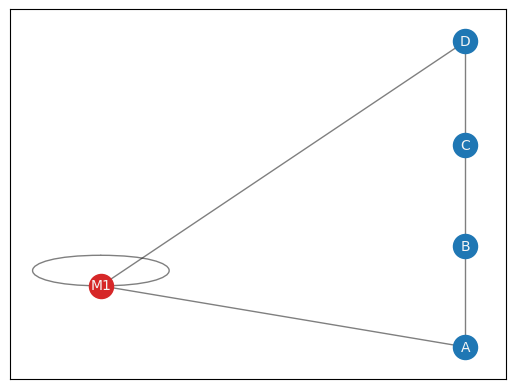

In [41]:
# Contract Motif and calculate betweeness
contracted = nx.contracted_nodes(g, motif[0], motif[1])
for n in motif[2:]:
    contracted = nx.contracted_nodes(contracted, motif[0], n)

nx.draw_networkx_nodes(
    contracted, pos, nodelist=[motif[0]], node_color="tab:red"
)
nx.draw_networkx_nodes(
    contracted, pos, nodelist=["A", "B", "C", "D"], node_color="tab:blue"
)
nx.draw_networkx_edges(
    contracted, pos, width=1.0, alpha=0.5,
)

labels = {n: n for n in contracted.nodes}

nx.draw_networkx_labels(contracted, pos, labels, font_size=10, font_color="whitesmoke")

In [42]:
all_shortest_paths = dict(nx.all_pairs_shortest_path(contracted))
all_shortest_paths

{'A': {'A': ['A'],
  'B': ['A', 'B'],
  'M1': ['A', 'M1'],
  'C': ['A', 'B', 'C'],
  'D': ['A', 'M1', 'D']},
 'B': {'B': ['B'],
  'A': ['B', 'A'],
  'C': ['B', 'C'],
  'M1': ['B', 'A', 'M1'],
  'D': ['B', 'C', 'D']},
 'C': {'C': ['C'],
  'B': ['C', 'B'],
  'D': ['C', 'D'],
  'A': ['C', 'B', 'A'],
  'M1': ['C', 'D', 'M1']},
 'D': {'D': ['D'],
  'C': ['D', 'C'],
  'M1': ['D', 'M1'],
  'B': ['D', 'C', 'B'],
  'A': ['D', 'M1', 'A']},
 'M1': {'M1': ['M1'],
  'A': ['M1', 'A'],
  'D': ['M1', 'D'],
  'B': ['M1', 'A', 'B'],
  'C': ['M1', 'D', 'C']}}